# HW 7 Scanpy Kharytonau
I decided to analyze Single-Cell RNA-Sequencing From Mouse Incisor Reveals Dental Epithelial Cell-Type Specific Genes https://www.frontiersin.org/articles/10.3389/fcell.2020.00841/full . Link to the dataset is https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSM4407907 <br>
First we need to unzip data, because read_10x_mtx recognises zipped files as output of cellranger 3, we are dealing with cellranger 2 output

In [2]:
import os
import scanpy as sc
import gzip
import os

In [173]:
import os
import scanpy as sc




import gzip
import os

folder_path = 'data'

file_list = os.listdir(folder_path)

for file_name in file_list:
    if file_name.endswith('.gz'):
        input_file = os.path.join(folder_path, file_name)
        output_file = os.path.join(folder_path, os.path.splitext(file_name)[0])
        
        with gzip.open(input_file, 'rb') as f_in:
            with open(output_file, 'wb') as f_out:
                f_out.write(f_in.read())
        
        print(f"File '{file_name}' unzipped successfully.")

print("All gzip files in the folder have been unzipped.")



File 'barcodes.tsv.gz' unzipped successfully.
File 'features.tsv.gz' unzipped successfully.
File 'GSM3161971_barcodes.tsv.gz' unzipped successfully.
File 'GSM3161971_genes.tsv.gz' unzipped successfully.
File 'GSM3161971_matrix.mtx.gz' unzipped successfully.
File 'GSM4407907_barcodes.tsv.gz' unzipped successfully.
File 'GSM4407907_genes.tsv.gz' unzipped successfully.
File 'GSM4407907_matrix.mtx.gz' unzipped successfully.
File 'matrix.mtx.gz' unzipped successfully.
All gzip files in the folder have been unzipped.


In [3]:
# Load UMI raw matrices to anndata objects
data1 = sc.read_10x_mtx(path='data', prefix= 'GSM4407907_')

In [4]:
adata  = data1
adata
#reassign variable just not to reboot read_10x every time i change thrashholds


AnnData object with n_obs × n_vars = 6260 × 48816
    var: 'gene_ids'

In [5]:
adata.var['mt'] = adata.var_names.str.startswith(r'mt-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
adata

AnnData object with n_obs × n_vars = 6260 × 48816
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

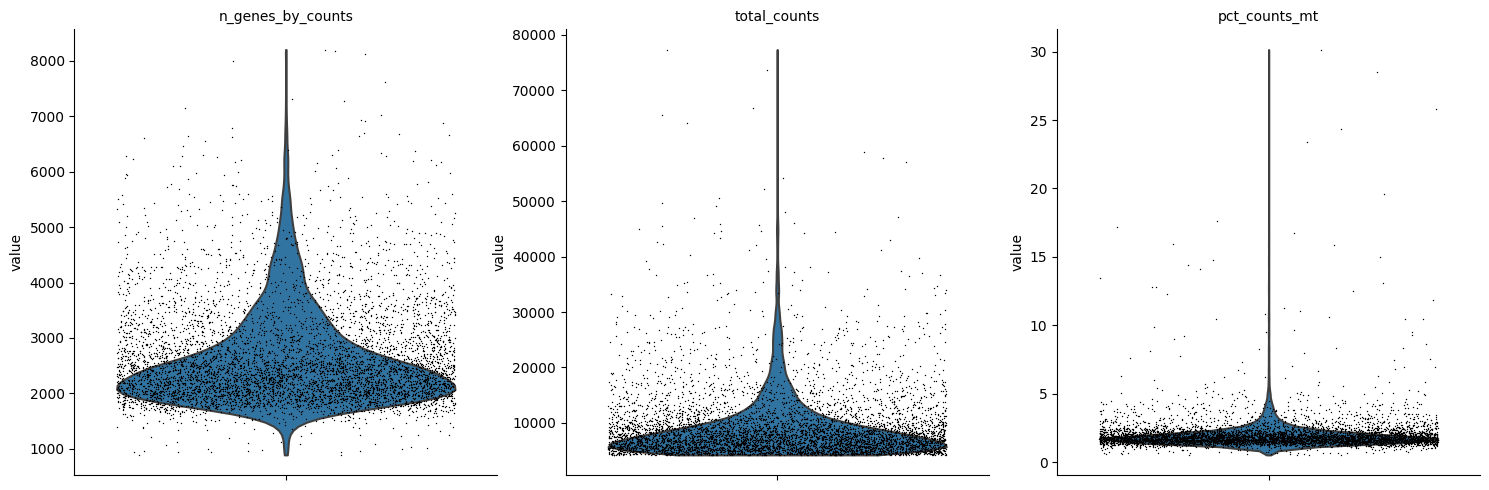

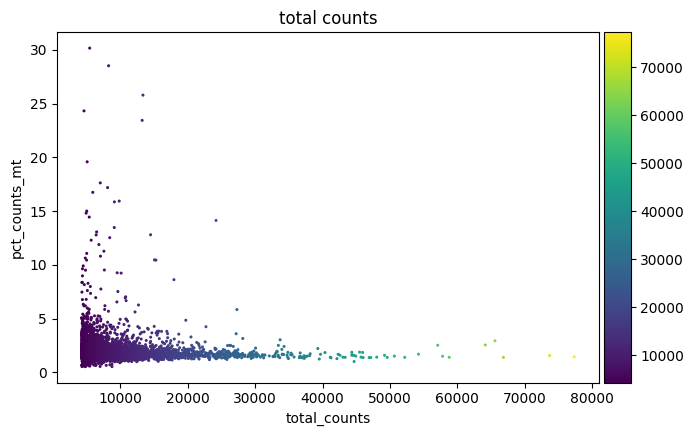

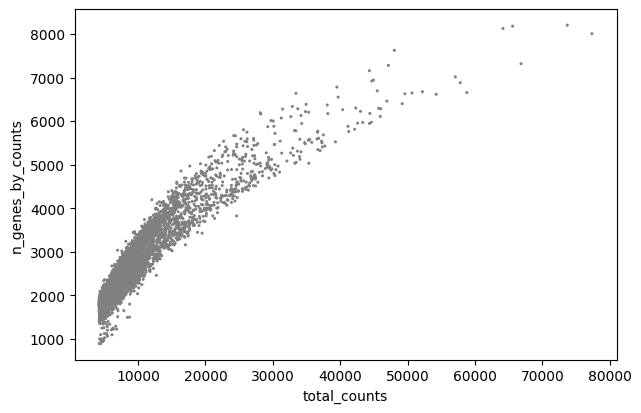

In [6]:
# And look at them

sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'], jitter=0.4, multi_panel=True)
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt', color='total_counts')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

filtering data with empirically set thrashholds

In [7]:
sc.pp.filter_cells(adata, min_genes=1200)
sc.pp.filter_cells(adata, max_counts=20000)
sc.pp.filter_genes(adata, min_cells=300)

adata = adata[adata.obs.pct_counts_mt < 10, :]

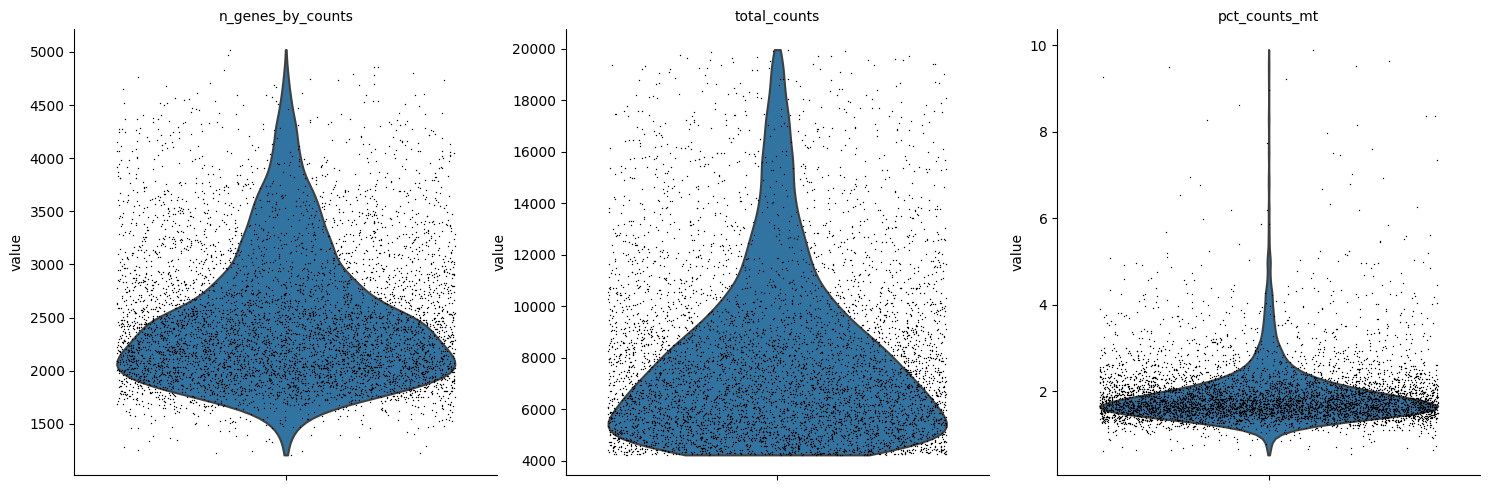

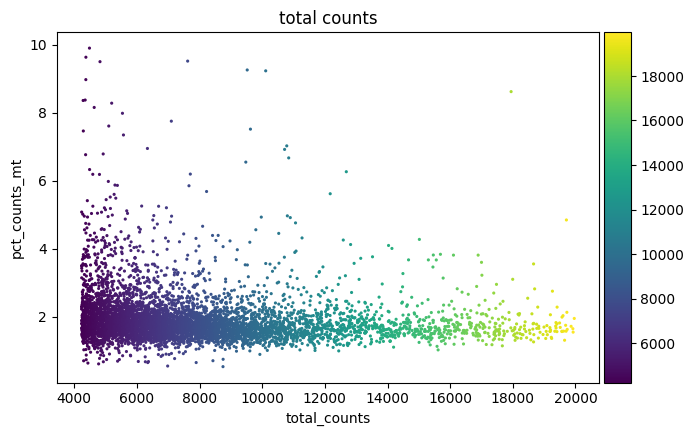

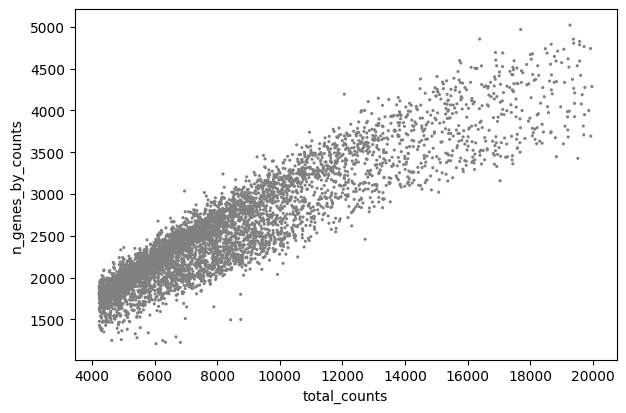

In [8]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'], jitter=0.4, multi_panel=True)

sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt', color='total_counts')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

Normalize, log data, then computing highly variable genes, and calculating principle component for futher analysis and visualization

In [9]:
sc.pp.normalize_total(adata, target_sum=1e4)

c:\Python311\Lib\site-packages\scanpy\preprocessing\_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [10]:
sc.pp.log1p(adata)

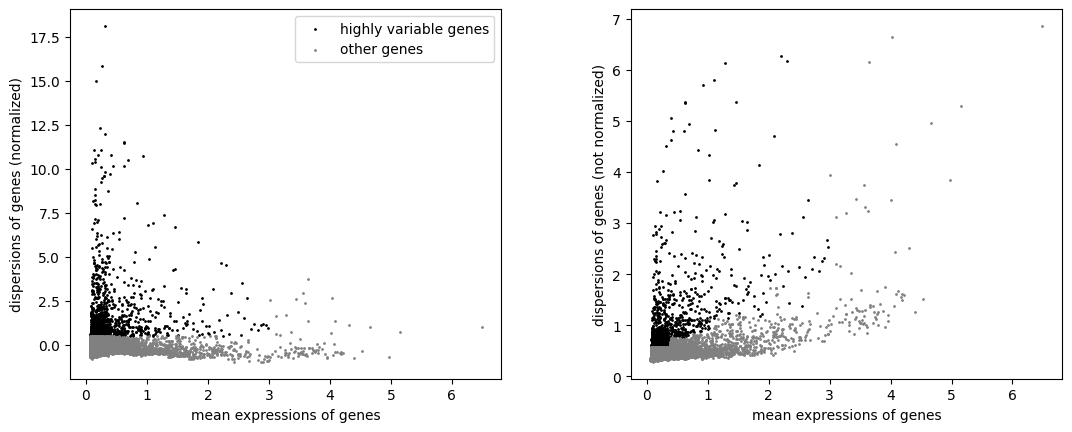

highly_variable
False    8044
True      970
Name: count, dtype: int64

In [11]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pl.highly_variable_genes(adata)
adata.var.highly_variable.value_counts()

In [12]:
adata.raw = adata
adata = adata[:, adata.var.highly_variable]
sc.pp.scale(adata, max_value=10)
sc.tl.pca(adata)

c:\Python311\Lib\site-packages\scanpy\preprocessing\_simple.py:843: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


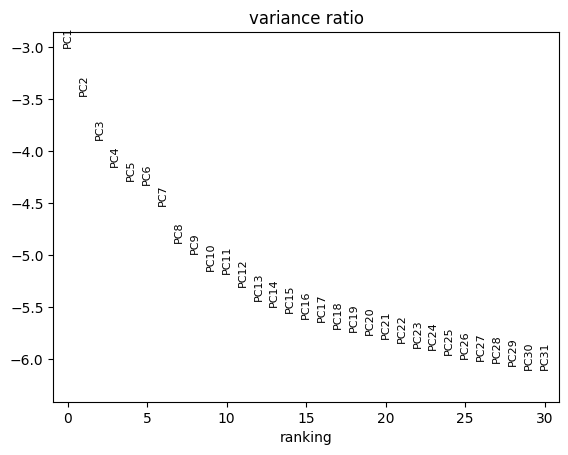

In [13]:
sc.pl.pca_variance_ratio(adata, log=True)
#graphycally represent variance ratio of different principe components

In [14]:
sc.pp.neighbors(adata, n_pcs=15, metric='cosine')

c:\Python311\Lib\site-packages\umap\distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
c:\Python311\Lib\site-packages\umap\distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
c:\Python311\Lib\site-packages\umap\distances.py:1086: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 

Now we will visualize results with umap and t-sne plots

In [15]:
sc.tl.tsne(adata)

c:\Python311\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  cax = scatter(


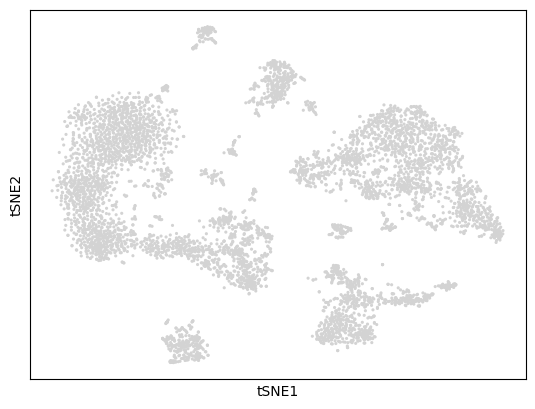

In [16]:
sc.pl.tsne(adata)

In [17]:
sc.tl.umap(adata)

c:\Python311\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  cax = scatter(


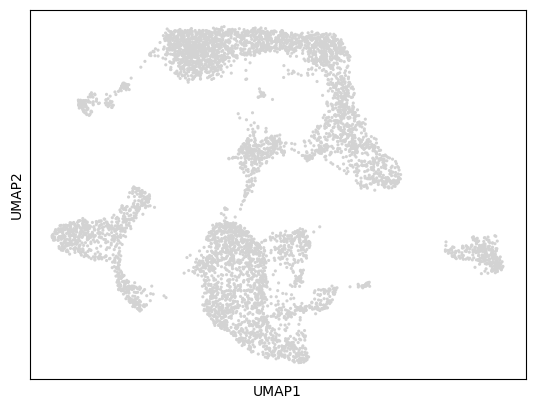

In [18]:
sc.pl.umap(adata)

Now we are performing clasterization. The resolution is kind of empirically set, based on exprected number of clusters to get

In [19]:
sc.tl.leiden(adata,  resolution=0.2)

c:\Python311\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


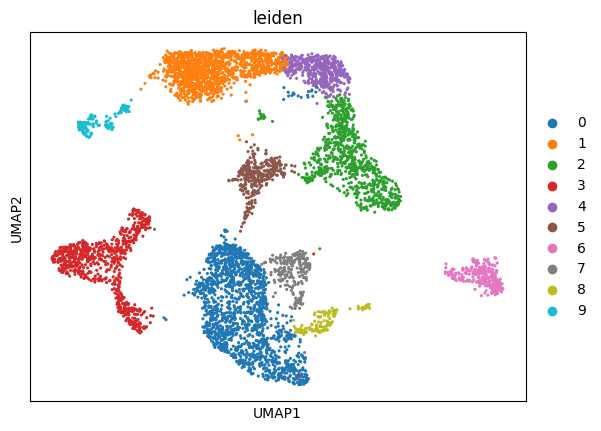

In [20]:
sc.pl.umap(adata, color=['leiden'])

c:\Python311\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


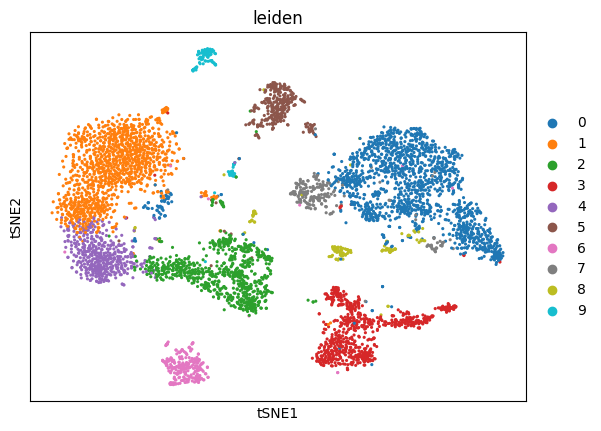

In [21]:
sc.pl.tsne(adata, color=['leiden'])

Now we will try to see the distribution of our main cell types markers among clusters we have got

c:\Python311\Lib\site-packages\scanpy\plotting\_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


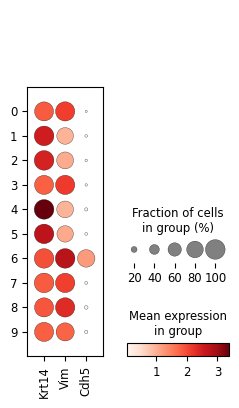

In [51]:
marker_genes = ['Krt14', 'Vim', 'Cdh5']
sc.pl.dotplot(adata, marker_genes, groupby='leiden')

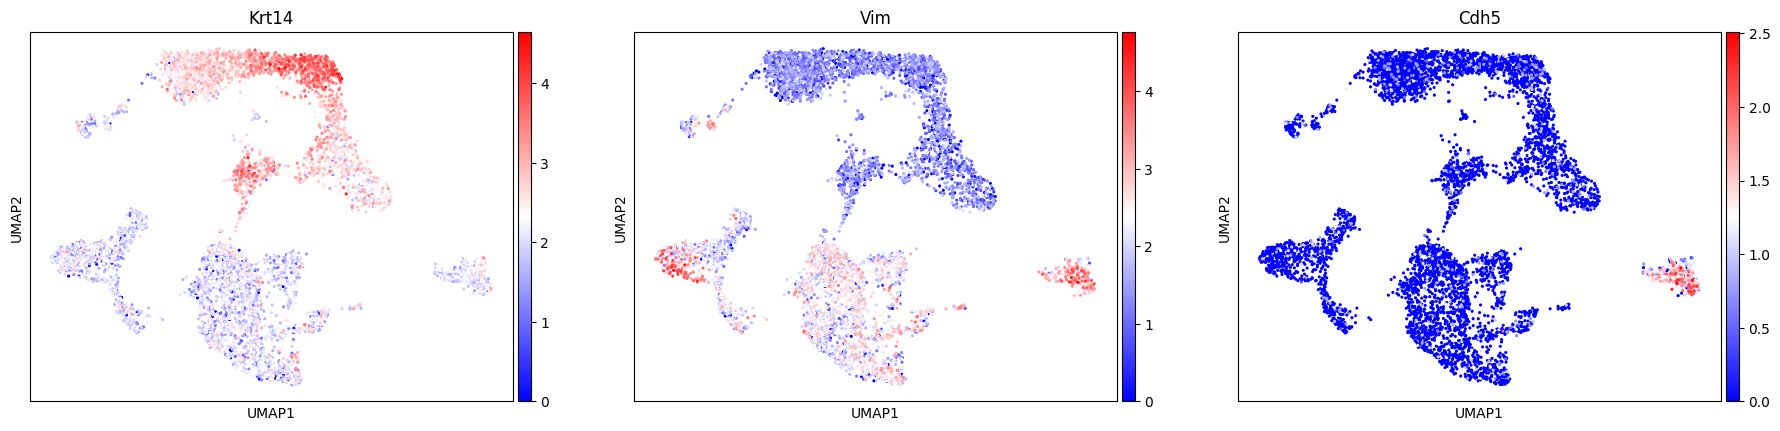

In [23]:
sc.pl.umap(adata, color=['Krt14', 'Vim', 'Cdh5'], color_map='bwr')

Here we see 3 well defind clusters: Epithelium, mesenchyme and erythrocyte, lets look closer on subtypes markers

categories: 0, 1, 2, etc.
var_group_labels: 2, 3, 4, etc.


c:\Python311\Lib\site-packages\scanpy\plotting\_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


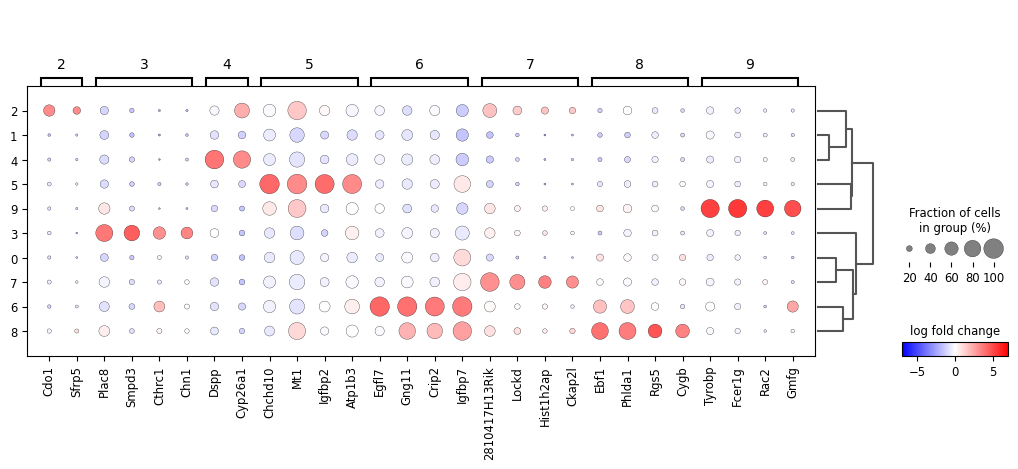

In [55]:
sc.pl.rank_genes_groups_dotplot(adata, n_genes=4, values_to_plot='logfoldchanges', min_logfoldchange=3, vmax=7, vmin=-7, cmap='bwr')

We can not see markers for cluster 1 and 0 because their markers are overrepresented, lets look closer on the plots below

In [37]:
sc.tl.rank_genes_groups(adata, groupby='leiden', method='t-test')

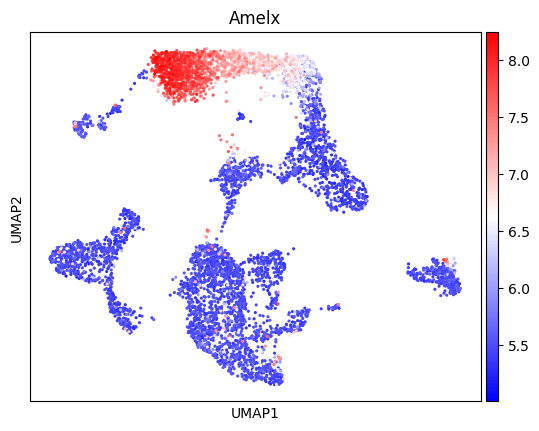

In [39]:
sc.pl.umap(adata, color=['Amelx'], color_map='bwr')

Lets now look at the most defferentially expressed genes between the clusters, and define subtypes based on this data. 

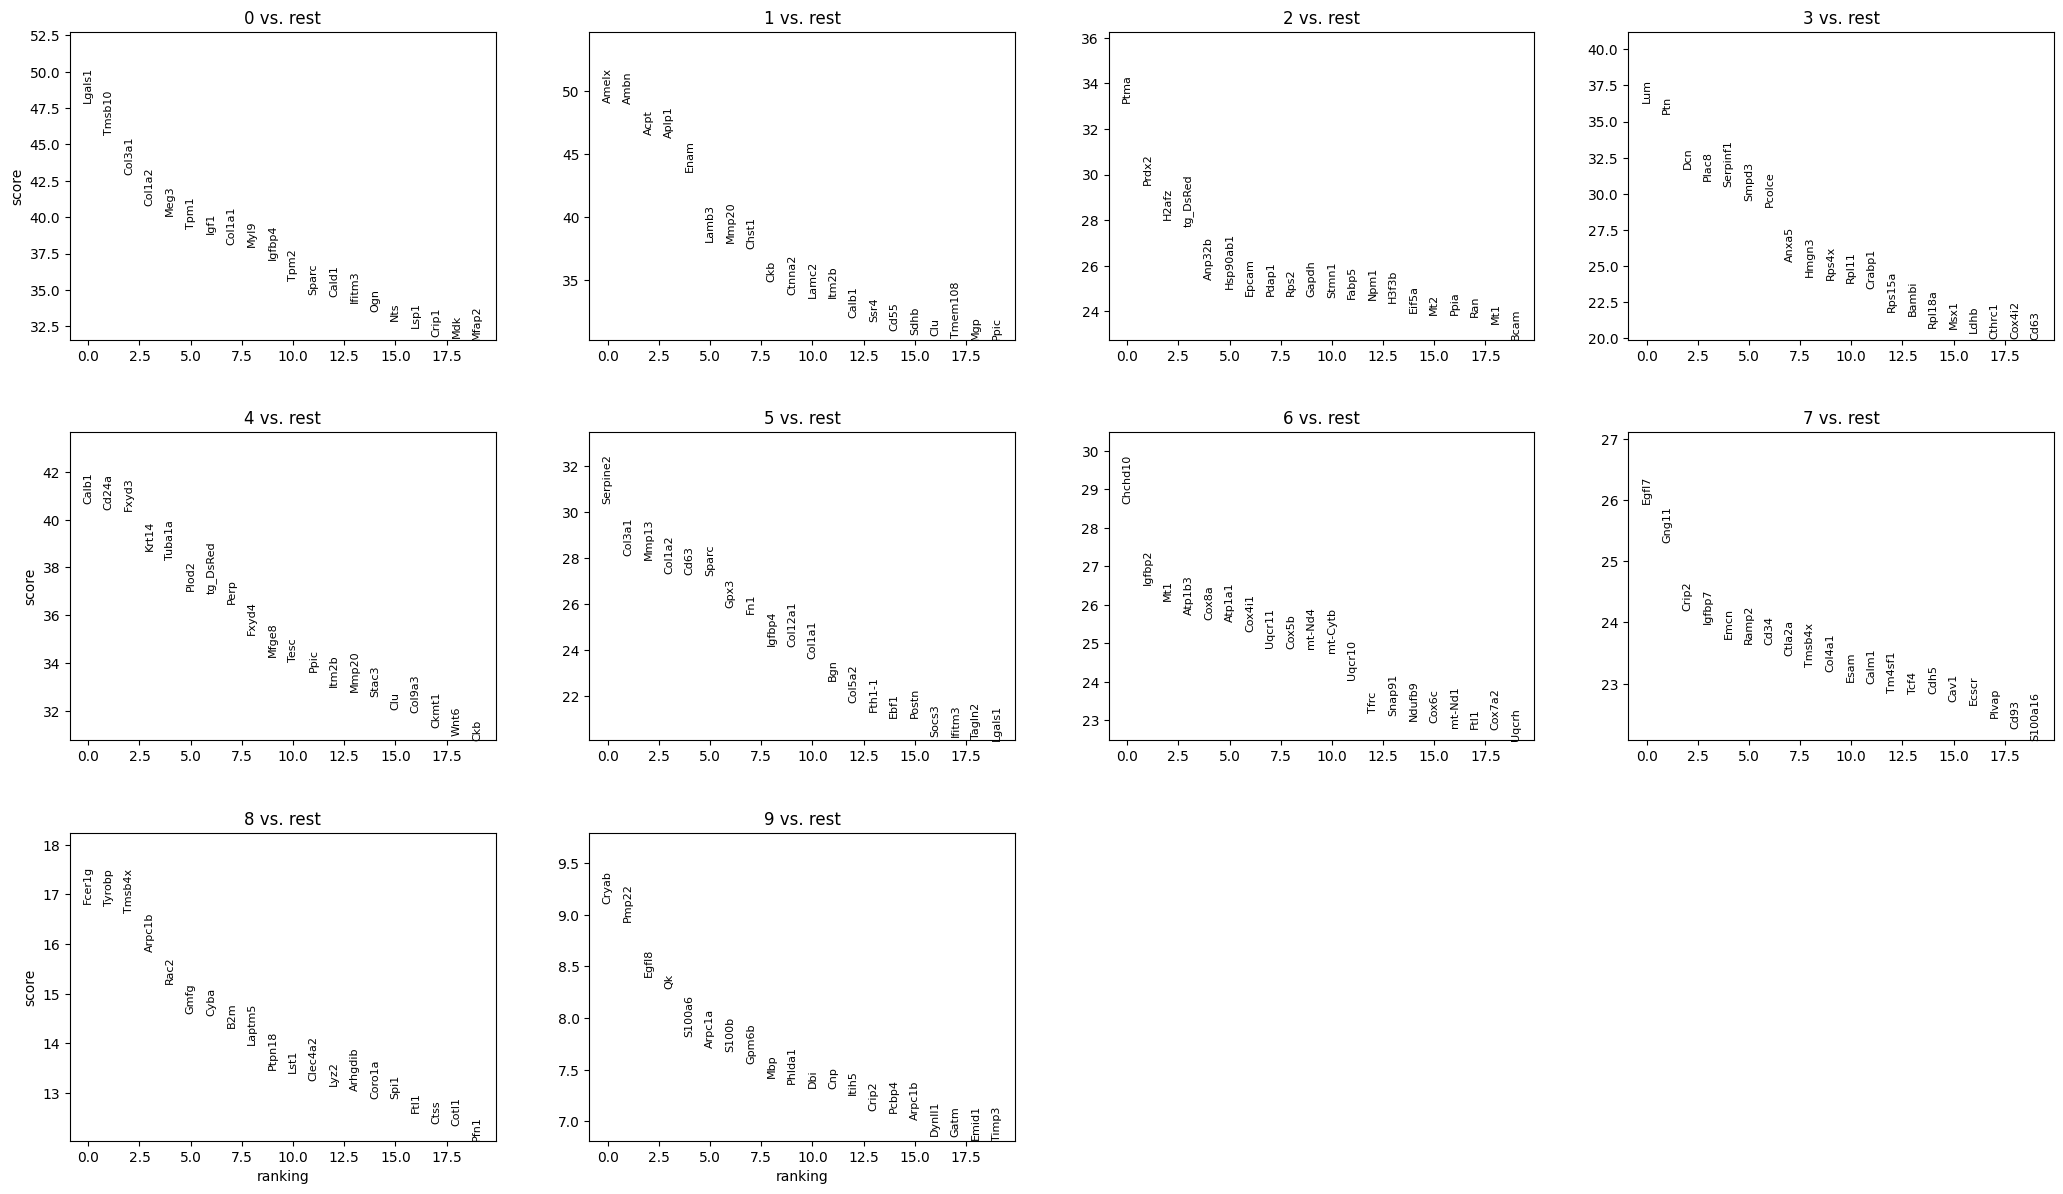

In [ ]:
# Differential expression between the clusters

sc.tl.rank_genes_groups(adata, 'leiden', method='wilcoxon')
sc.pl.rank_genes_groups(adata, n_genes=20, sharey=False)

In [ ]:
sc.get.rank_genes_groups_df(adata, group=['1']).head(n=10)

,names,scores,logfoldchanges,pvals,pvals_adj
0,Amelx,49.035862,2.842139,0.000000e+00,0.000000e+00
1,Ambn,49.004505,2.696266,0.000000e+00,0.000000e+00
2,Acpt,46.518452,2.571706,0.000000e+00,0.000000e+00
3,Aplp1,46.278099,2.504403,0.000000e+00,0.000000e+00
4,Enam,43.584339,2.329722,0.000000e+00,0.000000e+00
5,Lamb3,38.043201,2.446428,0.000000e+00,0.000000e+00
6,Mmp20,37.944897,1.868592,0.000000e+00,0.000000e+00
7,Chst1,37.493149,2.621796,1.191099e-307,7.157713e-305
8,Ckb,34.867867,1.317894,2.282821e-266,6.430422e-264
9,Ctnna2,33.857738,1.810999,2.792128e-251,7.402423e-249


The log2FC for cluster 1 is not that huge, but at the same time, counting on that our data is log transformed, and that it is logFC between other clusters (in which this gene is expressed, but in not so hight amount), we can confidently say, that this is a marker of ameloblasts. But we still can lower thrashhold )

c:\Python311\Lib\site-packages\scanpy\plotting\_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


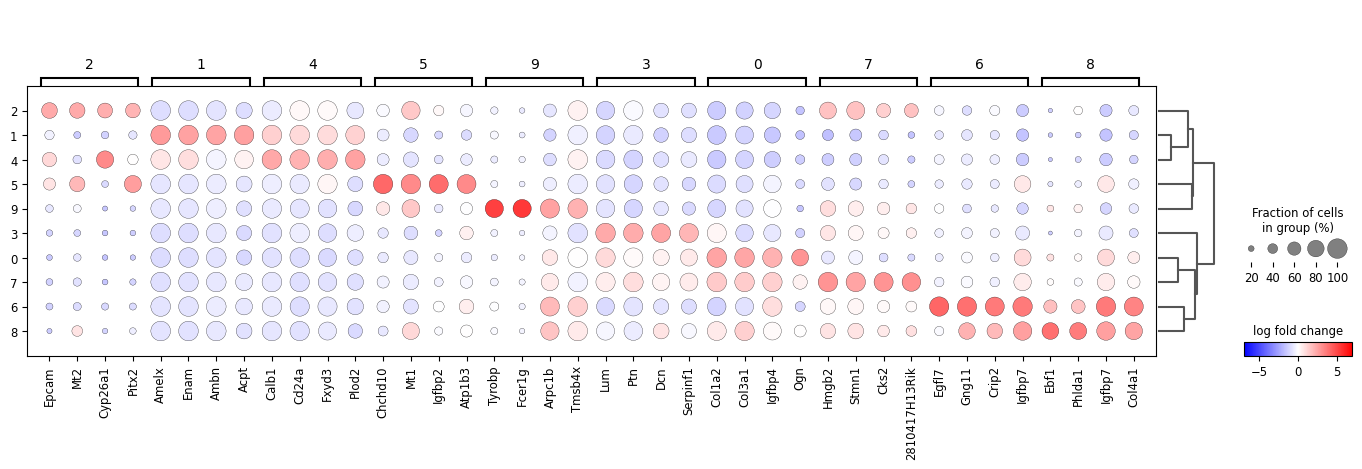

In [56]:
sc.pl.rank_genes_groups_dotplot(adata, n_genes=4, values_to_plot='logfoldchanges', min_logfoldchange=2, vmax=7, vmin=-7, cmap='bwr')

Our data is really close to data, provided in article
The differenses are caused by using different data processing instruments and thrashhold chosen

![plots_from_article](https://www.frontiersin.org/files/Articles/572726/fcell-08-00841-HTML/image_m/fcell-08-00841-g001.jpg)

![subclasses](https://www.frontiersin.org/files/Articles/572726/fcell-08-00841-HTML/image_m/fcell-08-00841-g002.jpg)